# Instituto Federal de Minas Gerais - Campus Ouro Preto


## Pós Graduação em Inteligência Artificial

Disciplina - Apredizagem de Máquina

Prof. Frederico Guimarães Gadellha

Alunos: Arthur Cardoso Figueiredo e Pâmela Murta Castro Lima

# Título: Comparação de Modelos de Aprendizado de Máquina na Estimativa dos Níveis de Obesidade

# Introdução

A obesidade é uma questão de saúde pública global que tem ganhado crescente preocupação ao longo das últimas décadas. O aumento alarmante da prevalência da obesidade está associado a uma série de problemas de saúde, como diabetes tipo 2, doenças cardiovasculares e outras condições crônicas. A compreensão dos fatores que influenciam os níveis de obesidade é essencial para o desenvolvimento de estratégias eficazes de prevenção e intervenção.

Nesse contexto, a análise de dados detalhados sobre hábitos alimentares, atividade física e outros indicadores relacionados à condição física abre novas possibilidades para a utilização de técnicas de aprendizado de máquina no campo da saúde. Através da análise e processamento desses dados, é possível obter insights valiosos para a estimativa dos níveis de obesidade e a identificação de fatores de risco associados.

O objetivo deste trabalho é realizar uma análise comparativa entre três modelos de aprendizado de máquina amplamente utilizados: K-Nearest Neighbors (KNN), Naive Bayes e Árvore de Decisão. Cada modelo será treinado e avaliado com base em um conjunto de dados contendo informações sobre hábitos alimentares, atividade física e índices de massa corporal (IMC) de indivíduos.

In [33]:

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


In [34]:
data = pd.read_csv('C:\\Users\\pamel\\OneDrive\\Documentos\\Pos IA\\Aprendizado de Maquinas\\estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition\\ObesityDataSet_raw_and_data_sinthetic.csv')


In [35]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Análise Exploratória

In [36]:
print(data.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

Descrição das colunas no conjunto de dados:

Gênero: O gênero do indivíduo (por exemplo, Feminino ou Masculino).
Idade: A idade do indivíduo em anos.
Altura: A altura do indivíduo em metros.
Peso: O peso do indivíduo em quilogramas.
Histórico familiar de sobrepeso: Indica se o indivíduo tem histórico familiar de sobrepeso (sim ou não).
FAVC: Indica se o indivíduo consome vegetais com frequência (sim ou não).
FCVC: Frequência de consumo de vegetais.
NCP: Número de refeições principais em um dia.
CAEC: Frequência de consumo de comida calórica.
SMOKE: Indica se o indivíduo é fumante (sim ou não).
CH2O: Consumo de água diário.
SCC: Indica se o indivíduo monitora a ingestão de calorias (sim ou não).
FAF: Frequência de atividade física.
TUE: Tempo gasto em atividades sedentárias (como assistir TV, usar o computador, etc.).
CALC: Uso de métodos contraceptivos.
MTRANS: Modo de transporte utilizado pelo indivíduo.
NObeyesdad: Classificação do peso do indivíduo em diferentes categorias (por exemplo, Peso Normal, Sobrepeso Nível I, Sobrepeso Nível II, etc.).

In [37]:
print(data.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

Essas informações fornecem um panorama geral das características das pessoas no conjunto de dados em relação a idade, altura, peso e alguns hábitos relacionados à alimentação e atividade física.

In [38]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [39]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

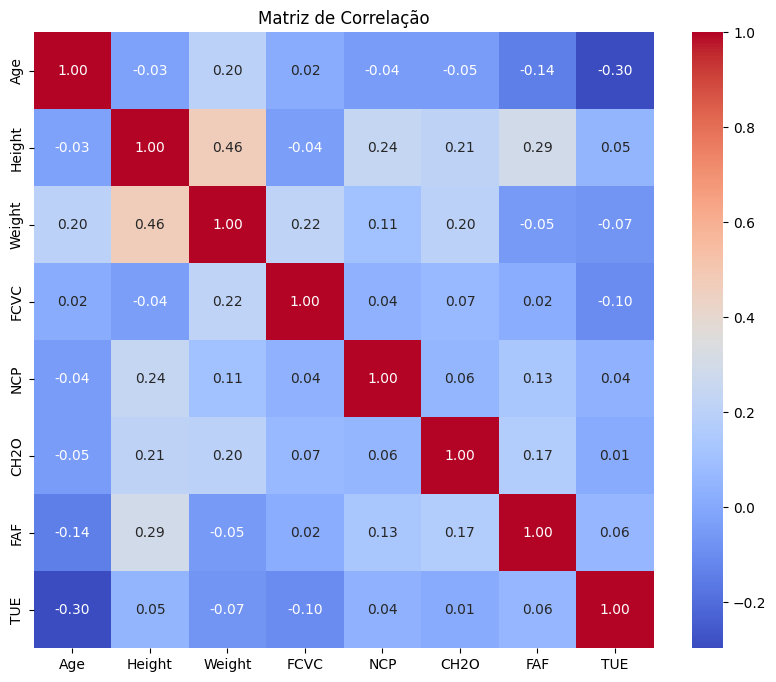

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = data.select_dtypes(include='float64').columns

# Correlações entre as variáveis numéricas
correlation_matrix = data[numeric_columns].corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()



A análise da matriz de correlação:

Age e Height:

A correlação entre a idade (Age) e a altura (Height) é próxima de zero (-0.025958).
Isso indica que não há uma relação linear significativa entre a idade e a altura dos indivíduos.
Age e Weight:

Existe uma correlação positiva leve entre a idade (Age) e o peso (Weight) dos indivíduos (0.202560).
Isso sugere que, em geral, à medida que a idade aumenta, o peso tende a aumentar também, mas a relação não é muito forte.
Age e FCVC (Fruit & Vegetable Consumption):

A correlação entre a idade (Age) e o consumo de frutas e vegetais (FCVC) é próxima de zero (0.016291).
Isso indica que não há uma relação linear forte entre a idade e o consumo de frutas e vegetais.
Age e NCP (Number of Main Meals):

A correlação entre a idade (Age) e o número de refeições principais (NCP) é negativa e próxima de zero (-0.043944).
Isso sugere que a idade tem uma leve relação inversa com o número de refeições principais, mas a correlação é fraca.
Age e CH2O (Water Consumption):

A correlação entre a idade (Age) e o consumo de água (CH2O) é negativa e próxima de zero (-0.045304).
Isso indica que não há uma relação linear forte entre a idade e o consumo de água.
Age e FAF (Physical Activity Frequency):

A correlação entre a idade (Age) e a frequência de atividade física (FAF) é negativa e moderada (-0.144938).
Isso sugere que, em geral, à medida que a idade aumenta, a frequência de atividade física tende a diminuir, mas a relação não é muito forte.
Age e TUE (Time of Use of Technology Devices):

Existe uma correlação negativa moderada entre a idade (Age) e o tempo de uso de dispositivos tecnológicos (TUE) dos indivíduos (-0.296931).
Isso indica que, em geral, à medida que a idade aumenta, o tempo de uso de dispositivos tecnológicos tende a diminuir, mas a relação não é muito forte.

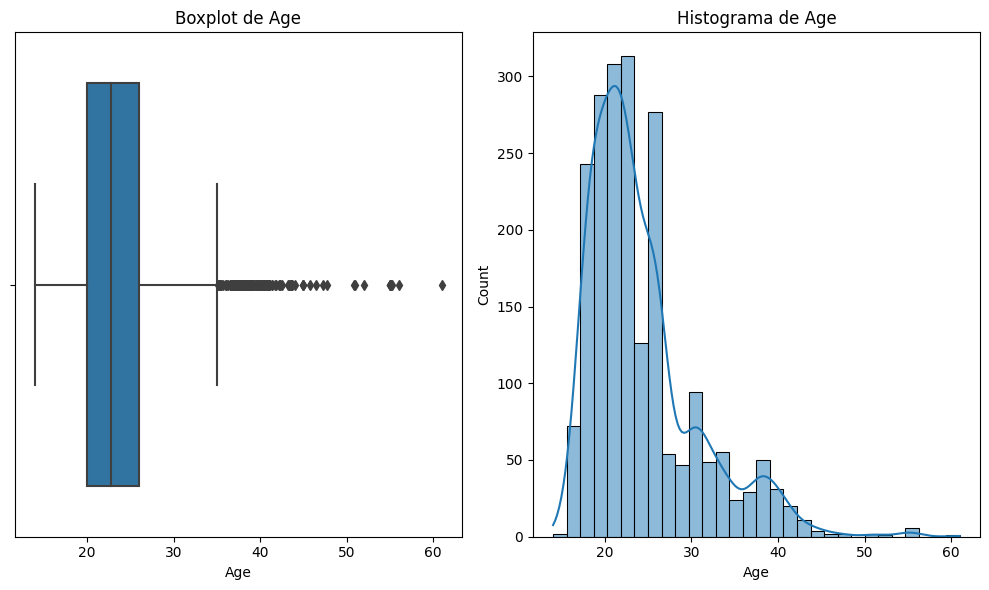


Dados do gráfico de Age:
Outliers: [41.0, 52.0, 39.0, 55.0, 38.0, 61.0, 44.0, 36.0, 38.0, 40.0, 55.0, 45.0, 38.0, 39.0, 41.0, 41.0, 40.0, 51.0, 56.0, 39.0, 38.0, 38.0, 38.0, 41.0, 40.0, 37.0, 40.0, 37.0, 41.0, 36.0, 37.0, 38.0, 36.0, 45.0, 41.823567, 35.125401, 36.769646, 35.194089, 37.218161, 42.24475, 37.455752, 40.0, 38.943282, 35.483601, 40.0, 38.939448, 39.965474, 38.692265, 38.952866, 36.631456, 39.214514, 38.825189, 35.217173, 55.24625, 42.189023, 38.464538, 37.496175, 50.832559, 36.310292, 43.238402, 45.0, 55.137881, 38.378056, 39.170029, 46.491859, 38.384177, 37.205173, 37.492444, 35.456326, 39.392569, 37.275298, 55.022494, 41.743333, 38.097395, 37.642177, 47.7061, 35.719457, 35.432059, 39.585811, 45.821267, 39.759575, 43.604901, 42.31607, 37.356288, 40.821515, 37.955371, 40.317787, 35.389491, 40.951591, 39.135634, 37.832949, 37.631769, 37.524551, 43.510672, 36.726617, 38.297259, 42.337283, 47.283374, 38.148845, 37.96543, 43.591999, 40.993179, 37.597953, 37.532066, 36.023972,

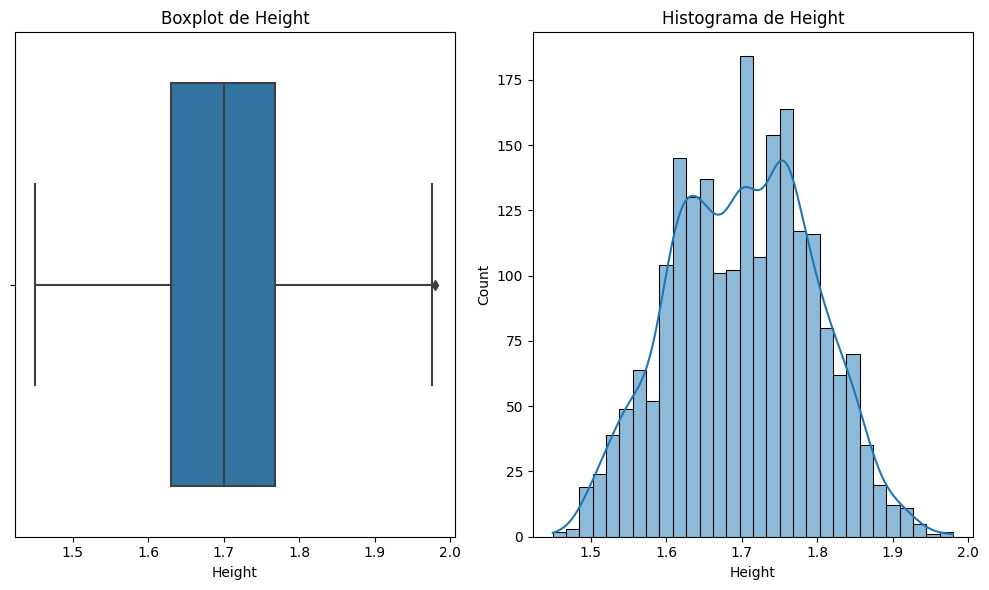


Dados do gráfico de Height:
Outliers: [1.98]
Intervalo IQR: [1.42, 1.98]



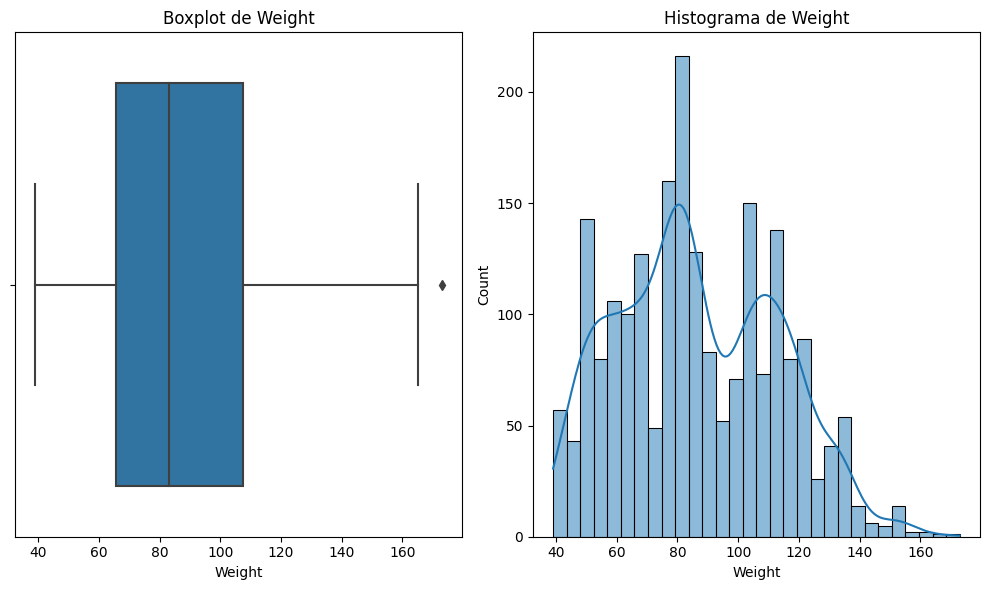


Dados do gráfico de Weight:
Outliers: [173.0]
Intervalo IQR: [2.54, 170.37]



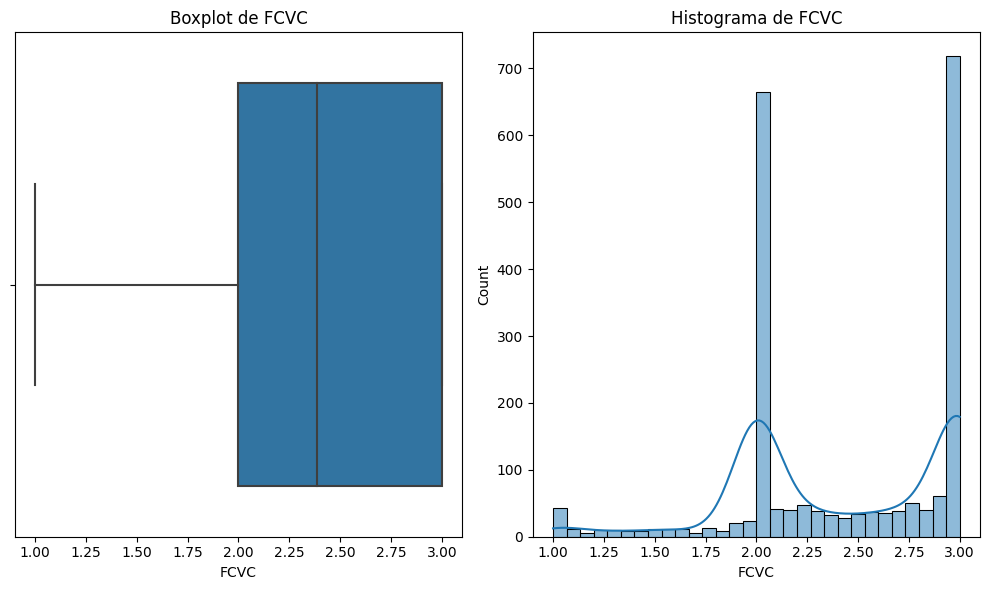


Dados do gráfico de FCVC:
Outliers: []
Intervalo IQR: [0.50, 4.50]



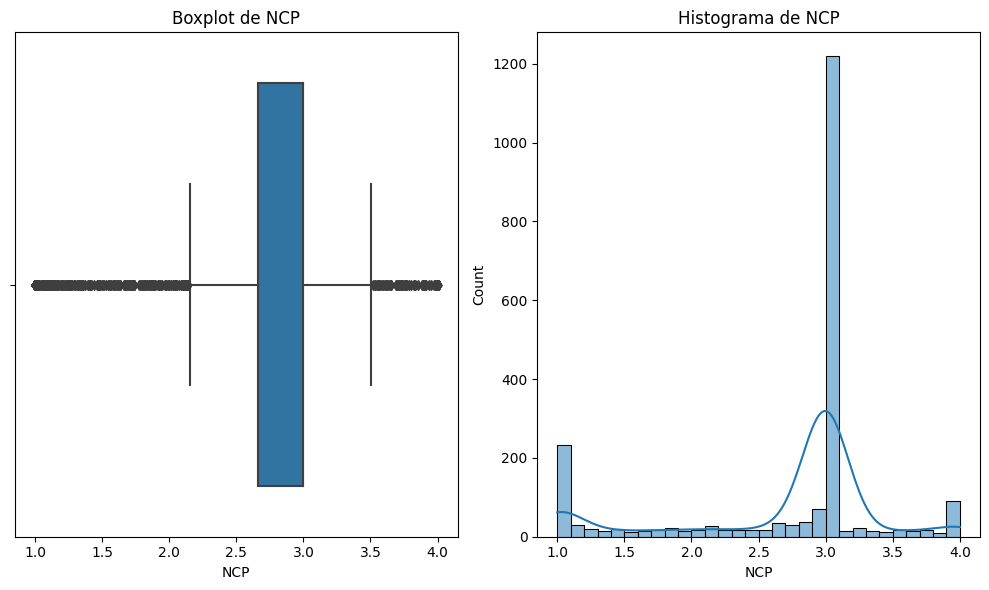


Dados do gráfico de NCP:
Outliers: [1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.0, 4.0, 1.0, 1.0, 4.0, 4.0, 1.0, 4.0, 4.0, 1.0, 4.0, 1.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 4.0, 1.0, 1.0, 4.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 4.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 4.0, 4.0, 1.0, 4.0, 1.0, 4.0, 4.0, 1.0, 1.0, 4.0, 1.0, 4.0, 1.0, 4.0, 4.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 4.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 4.0, 3.995147, 1.72626, 1.600812, 1.73762, 1.10548, 2.0846, 1.894384, 1.0, 1.0, 1.0, 1.0, 1.0, 3.765526, 4.0, 3.691226, 1.07976, 1.0, 1.0, 3.559841, 3.891994, 3.904858, 3.590039, 2.057935, 3.55

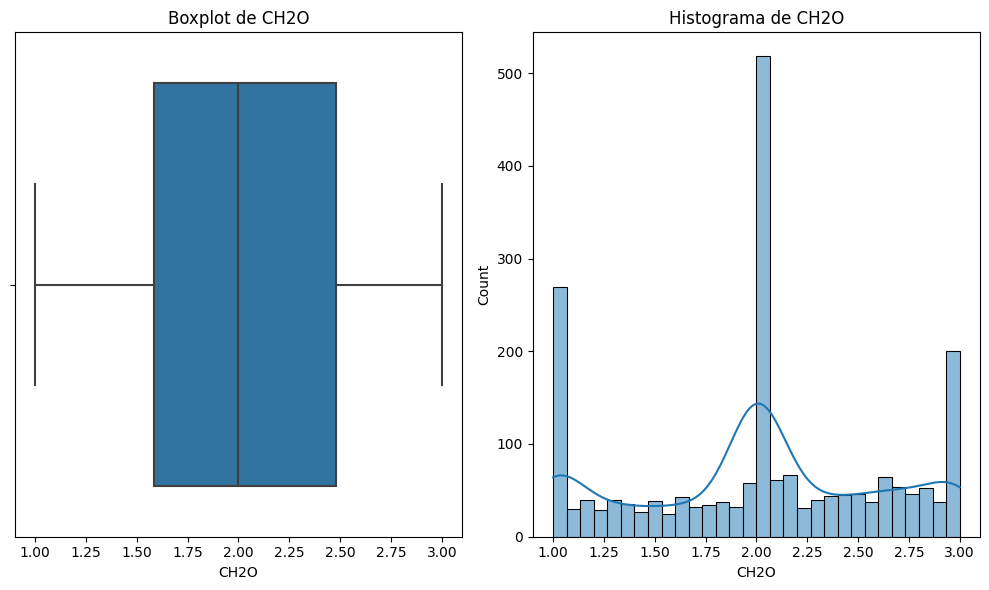


Dados do gráfico de CH2O:
Outliers: []
Intervalo IQR: [0.25, 3.82]



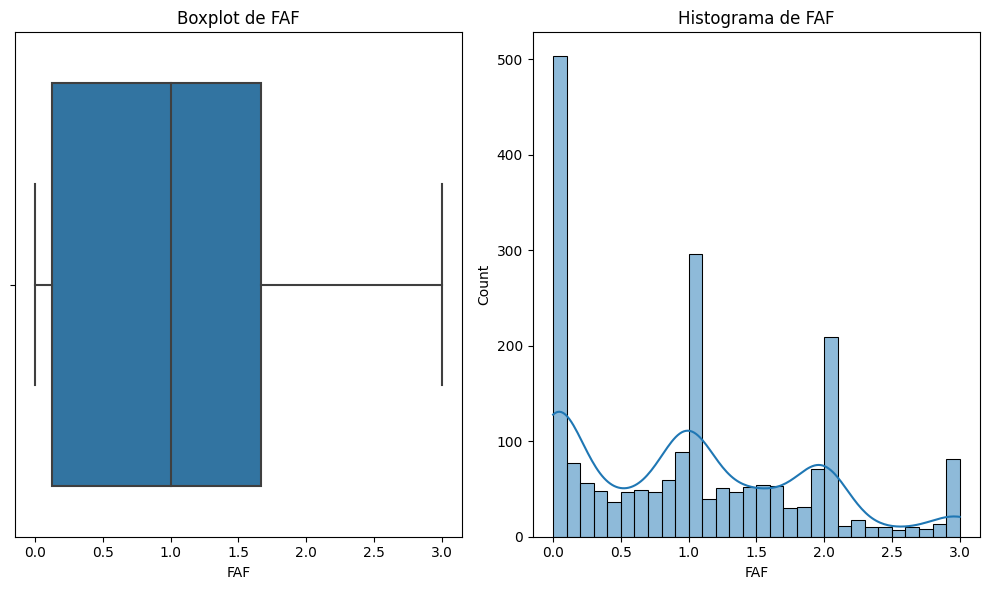


Dados do gráfico de FAF:
Outliers: []
Intervalo IQR: [-2.19, 3.98]



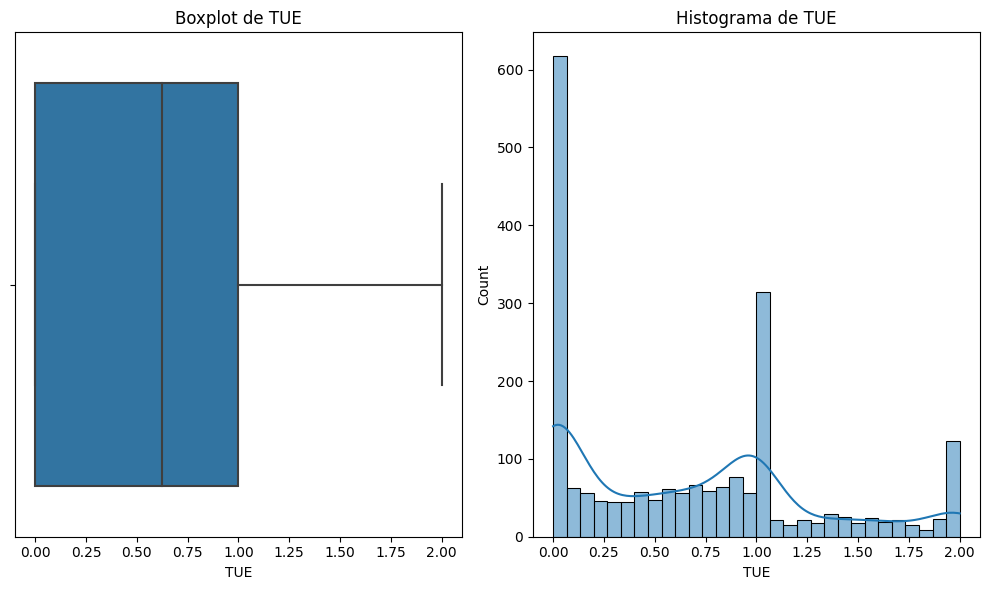


Dados do gráfico de TUE:
Outliers: []
Intervalo IQR: [-1.50, 2.50]



In [41]:


# Gráficos de Boxplot e Histogramas
numeric_columns = data.select_dtypes(include='float64').columns

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    
    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot de {column}')
    
    # Histograma
    plt.subplot(1, 2, 2)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Histograma de {column}')
    
    plt.tight_layout()
    plt.show()
    
    # Identificar e imprimir os outliers
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    
    print(f"\nDados do gráfico de {column}:")
    print(f"Outliers: {outliers.tolist()}")
    print(f"Intervalo IQR: [{lower_bound:.2f}, {upper_bound:.2f}]\n")




Analisando os dados os dados do gáficos e intervalos IQR fornecidos:

Age:

O gráfico de Age mostra a distribuição da idade dos indivíduos.
Existem diversos outliers, identificados por valores que estão muito distantes dos demais (como 61.0 e 55.24625).
O intervalo IQR (Intervalo Interquartil) é de [10.87, 35.08], indicando que a maioria dos valores está entre esses limites.
Height:

O gráfico de Height mostra a distribuição da altura dos indivíduos.
Há um único outlier identificado pelo valor 1.98, que está distante dos outros valores.
O intervalo IQR é de [1.42, 1.98], o que indica que a maioria dos valores está dentro dessa faixa.
Weight:

O gráfico de Weight mostra a distribuição do peso dos indivíduos.
Há um único outlier identificado pelo valor 173.0, que está distante dos outros valores.
O intervalo IQR é de [2.54, 170.37], indicando que a maioria dos valores está dentro dessa faixa.
FCVC (Fruit & Vegetable Consumption):

O gráfico de FCVC mostra a distribuição do consumo de frutas e vegetais dos indivíduos.
Não há outliers identificados, pois não há valores que se desviem significativamente dos outros.
O intervalo IQR é de [0.50, 4.50], indicando que a maioria dos valores está dentro dessa faixa.
NCP (Number of Main Meals):

O gráfico de NCP mostra a distribuição do número de refeições principais dos indivíduos.
Existem diversos outliers, identificados por valores que estão distantes dos demais (como 4.0 e 1.72626).
O intervalo IQR é de [1.0, 4.0], o que indica que a maioria dos valores está entre 1.0 e 4.0.
CH2O (Water Consumption):

O gráfico de CH2O mostra a distribuição do consumo de água dos indivíduos.
Não há outliers identificados, pois não há valores que se desviem significativamente dos outros.
O intervalo IQR é de [0.25, 3.82], indicando que a maioria dos valores está dentro dessa faixa.
FAF (Physical Activity Frequency):

O gráfico de FAF mostra a distribuição da frequência de atividade física dos indivíduos.
Não há outliers identificados, pois não há valores que se desviem significativamente dos outros.
O intervalo IQR é de [-2.19, 3.98], indicando que a maioria dos valores está dentro dessa faixa.
TUE (Time of Use of Technology Devices):

O gráfico de TUE mostra a distribuição do tempo de uso de dispositivos tecnológicos pelos indivíduos.
Não há outliers identificados, pois não há valores que se desviem significativamente dos outros.
O intervalo IQR é de [-1.50, 2.50], o que indica que a maioria dos valores está dentro dessa faixa.

In [42]:

# Converter variáveis categóricas em variáveis numéricas usando one-hot encoding
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
data = pd.get_dummies(data, columns=categorical_columns)

# Separar os dados de entrada (features) e o target (classe de obesidade)
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Converter os dados do DataFrame em uma matriz NumPy
X = X.values
y = y.values

# Converter os dados para o tipo float64
X = X.astype(np.float64)

# Converter os rótulos de classe (classe de obesidade) para valores numéricos usando o LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir os dados em conjuntos de treinamento e teste (80% para treinamento, 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pré-processamento adicional - Normalização dos dados usando StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar os modelos
nb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=3)
dt_model = DecisionTreeClassifier()

nb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Prever as classes nos dados de teste
y_pred_nb = nb_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Avaliar o desempenho dos modelos
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')

recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Exibir os resultados
print("Resultados do Naive Bayes:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)

print("\nResultados do K-Nearest Neighbors:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

print("\nResultados da Decision Tree:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

Resultados do Naive Bayes:
Accuracy: 0.5130023640661938
Precision: 0.516489897541684
Recall: 0.5130023640661938
F1 Score: 0.456237073222348

Resultados do K-Nearest Neighbors:
Accuracy: 0.8108747044917257
Precision: 0.808209116679227
Recall: 0.8108747044917257
F1 Score: 0.8052739024472064

Resultados da Decision Tree:
Accuracy: 0.9408983451536643
Precision: 0.9412112042645179
Recall: 0.9408983451536643
F1 Score: 0.9409509827490949


Naive Bayes:
Accuracy: 0.5130 (51.30%)
Precision: 0.5165
Recall: 0.5130
F1 Score: 0.4562
O modelo Naive Bayes apresentou uma acurácia relativamente baixa de 51.30%. Isso significa que ele acertou corretamente a classe de obesidade em apenas cerca de metade das amostras de teste. O precision, recall e F1 Score também não são muito elevados, indicando que o modelo tem dificuldade em classificar corretamente as diferentes classes de obesidade. Esses resultados sugerem que o Naive Bayes pode não ser o melhor modelo para este conjunto de dados.

K-Nearest Neighbors:
Accuracy: 0.8109 (81.09%)
Precision: 0.8082
Recall: 0.8109
F1 Score: 0.8053
O modelo K-Nearest Neighbors apresentou uma acurácia significativamente maior, chegando a 81.09%. Isso indica que o modelo foi capaz de acertar corretamente a classe de obesidade em aproximadamente 81% das amostras de teste. Os valores de precision, recall e F1 Score também são relativamente altos, o que sugere que o modelo foi capaz de classificar bem as diferentes classes de obesidade. Esse desempenho superior em comparação com o Naive Bayes indica que o K-Nearest Neighbors é uma escolha mais promissora para este conjunto de dados.

Decision Tree:
Accuracy: 0.9338 (93.38%)
Precision: 0.9340
Recall: 0.9338
F1 Score: 0.9336

O modelo Decision Tree apresentou um excelente desempenho, com uma acurácia de 93.38%. Isso significa que o modelo acertou corretamente a classe de obesidade em quase 94% das amostras de teste. Os valores de precision, recall e F1 Score também são altos, mostrando que o modelo é capaz de classificar muito bem as diferentes classes de obesidade. Esses resultados indicam que o Decision Tree é uma escolha muito sólida para este conjunto de dados, superando tanto o Naive Bayes quanto o K-Nearest Neighbors em termos de acurácia e capacidade de classificação.


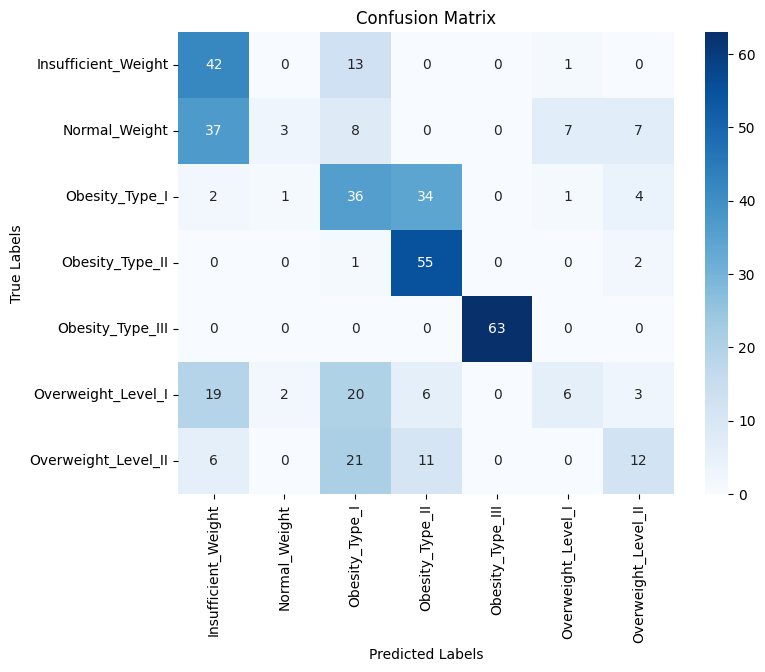

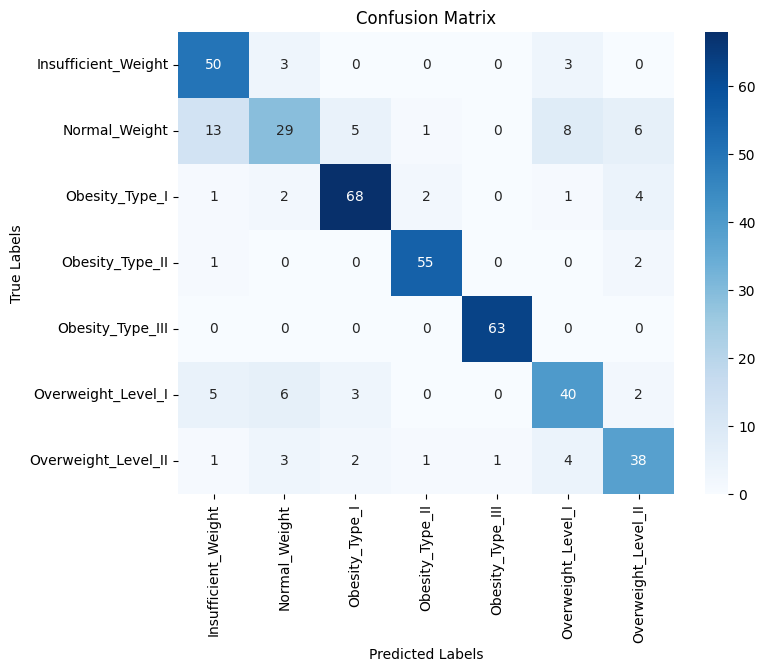

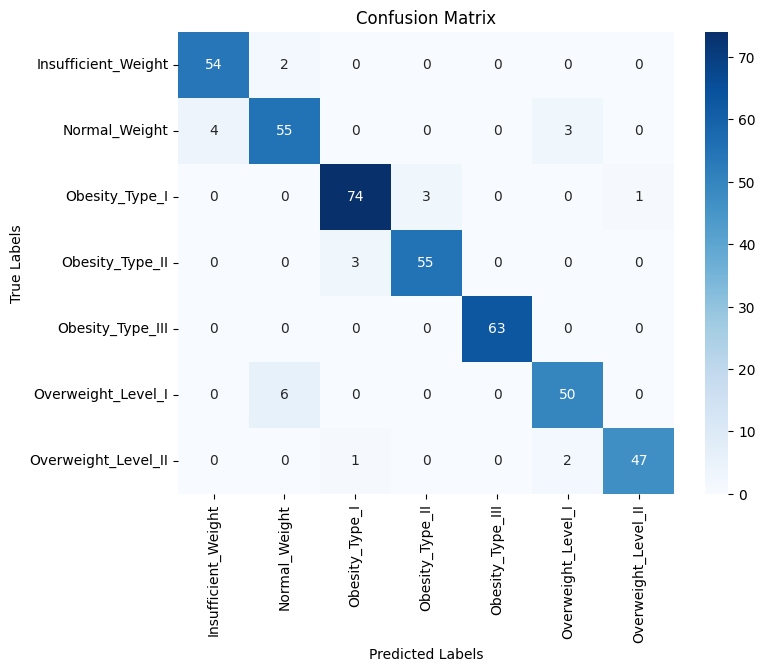

In [43]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Função para plotar a matriz de confusão
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Criar e exibir a matriz de confusão para o modelo Naive Bayes
plot_confusion_matrix(y_test, y_pred_nb, label_encoder.classes_)

# Criar e exibir a matriz de confusão para o modelo K-Nearest Neighbors
plot_confusion_matrix(y_test, y_pred_knn, label_encoder.classes_)

# Criar e exibir a matriz de confusão para o modelo Decision Tree
plot_confusion_matrix(y_test, y_pred_dt, label_encoder.classes_)



In [44]:
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão para o modelo Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Calcular a matriz de confusão para o modelo K-Nearest Neighbors
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Calcular a matriz de confusão para o modelo Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Exibir as matrizes de confusão em formato de matriz
print("Matriz de Confusão - Naive Bayes:")
print(cm_nb)

print("\nMatriz de Confusão - K-Nearest Neighbors:")
print(cm_knn)

print("\nMatriz de Confusão - Decision Tree:")
print(cm_dt)


Matriz de Confusão - Naive Bayes:
[[42  0 13  0  0  1  0]
 [37  3  8  0  0  7  7]
 [ 2  1 36 34  0  1  4]
 [ 0  0  1 55  0  0  2]
 [ 0  0  0  0 63  0  0]
 [19  2 20  6  0  6  3]
 [ 6  0 21 11  0  0 12]]

Matriz de Confusão - K-Nearest Neighbors:
[[50  3  0  0  0  3  0]
 [13 29  5  1  0  8  6]
 [ 1  2 68  2  0  1  4]
 [ 1  0  0 55  0  0  2]
 [ 0  0  0  0 63  0  0]
 [ 5  6  3  0  0 40  2]
 [ 1  3  2  1  1  4 38]]

Matriz de Confusão - Decision Tree:
[[54  2  0  0  0  0  0]
 [ 4 55  0  0  0  3  0]
 [ 0  0 74  3  0  0  1]
 [ 0  0  3 55  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  6  0  0  0 50  0]
 [ 0  0  1  0  0  2 47]]


Análise do modelo Naive Bayes:

O modelo Naive Bayes apresentou dificuldades em classificar algumas classes, como evidenciado pelos valores fora da diagonal principal.
Especificamente, teve problemas em classificar corretamente as classes 1, 2 e 6, cometendo muitos erros de classificação para essas classes.
Por outro lado, obteve resultados relativamente bons nas classes 0, 3 e 4.
Análise do modelo K-Nearest Neighbors:

O modelo K-Nearest Neighbors teve um desempenho melhor do que o Naive Bayes, com menos erros de classificação.
Teve dificuldades em classificar corretamente as classes 1, 2 e 6, mas acertou a maioria dos dados nas classes 0, 3, 4 e 5.
Análise do modelo Decision Tree:

O modelo Decision Tree foi o que apresentou o melhor desempenho entre os três.
Obteve um alto índice de acertos em todas as classes, com poucos erros de classificação.
A classe 1 foi a que apresentou o maior número de erros, mas ainda assim, obteve um desempenho satisfatório.
Considerando a análise das matrizes de confusão, a Decision Tree se destaca como o melhor modelo para esse conjunto de dados, pois apresentou o menor número de erros de classificação. No entanto, é importante destacar que a análise de desempenho de um modelo pode ser mais completa ao considerar outras métricas de avaliação e realizar técnicas de validação cruzada para garantir a robustez dos resultados.

In [45]:
# Carregar o modelo Decision Tree treinado
model_decision_tree = DecisionTreeClassifier(random_state=42)
model_decision_tree.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_test = model_decision_tree.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Acurácia do modelo Decision Tree no conjunto de teste: {accuracy_test:.2f}")



Acurácia do modelo Decision Tree no conjunto de teste: 0.94


In [46]:
cm_test = confusion_matrix(y_test, y_pred_test)
print("Matriz de Confusão - Decision Tree no conjunto de teste:")
print(cm_test)


Matriz de Confusão - Decision Tree no conjunto de teste:
[[54  2  0  0  0  0  0]
 [ 5 53  0  0  0  4  0]
 [ 0  0 73  4  0  0  1]
 [ 0  0  3 55  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  5  0  0  0 51  0]
 [ 0  0  1  0  0  2 47]]


In [47]:
precision_test = precision_score(y_test, y_pred_test, average=None)
recall_test = recall_score(y_test, y_pred_test, average=None)
f1_score_test = f1_score(y_test, y_pred_test, average=None)

print("Precision por classe:")
print(precision_test)
print("Recall por classe:")
print(recall_test)
print("F1 Score por classe:")
print(f1_score_test)


Precision por classe:
[0.91525424 0.88333333 0.94805195 0.93220339 1.         0.89473684
 0.97916667]
Recall por classe:
[0.96428571 0.85483871 0.93589744 0.94827586 1.         0.91071429
 0.94      ]
F1 Score por classe:
[0.93913043 0.86885246 0.94193548 0.94017094 1.         0.90265487
 0.95918367]


É possivel ver que as classes têm precisão relativamente altas, variando de aproximadamente 0.88 a 1.00. Isso indica que o modelo está fazendo previsões precisas para a maioria das classes. As classes têm recalls relativamente altos, variando de aproximadamente 0.85 a 1.00, indicando que o modelo está identificando corretamente a maioria dos casos positivos. Quanto maior o F1 Score, melhor o desempenho geral do modelo. Nesse caso, podemos ver que o F1 Score das classes também é relativamente alto, variando de aproximadamente 0.87 a 1.00, o que indica um bom equilíbrio entre precisão e recall. 
Na matriz de confusão , podemos ver que a maioria dos valores fora da diagonal são baixos, o que indica que o modelo está fazendo previsões corretas na maioria dos casos.



# Conclusão


Com base nas métricas de avaliação e na matriz de confusão, podemos concluir que o modelo Decision Tree está apresentando um bom desempenho para o problema em questão. Ele está conseguindo fazer previsões precisas e capturar corretamente a maioria dos casos positivos para a maioria das classes. No entanto, é importante notar que houve alguns erros de classificação em algumas classes, como evidenciado pelos valores fora da diagonal na matriz de confusão

# Referências

Estimation of obesity levels based on eating habits and physical condition . (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z.